In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_usa = pd.read_csv()
df_aus = pd.read_csv("D://database_AUS.csv")
df_ind = pd.read_csv("D://database_IND.csv")

data = pd.concat([df_usa, df_aus, df_ind], ignore_index=True)


In [3]:
print(data.head())

print(data.describe())

print(data.dtypes)


  country              country_long                            name  \
0     USA  United States of America  10 Briggs Solar NG  LLC (East)   
1     USA  United States of America      100 Brook Hill Drive Solar   
2     USA  United States of America      1001 Ebenezer Church Solar   
3     USA  United States of America             1008 Matthews Solar   
4     USA  United States of America               1009 Yadkin Solar   

    gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  USA0062781          0.0   41.6327   -71.4963          NaN         NaN   
1  USA0063292          2.0   41.0930   -73.9828        Solar         NaN   
2  USA0063444          0.0   36.2838   -80.8434          NaN         NaN   
3  USA0063447          0.0   36.2167   -80.5525          NaN         NaN   
4  USA0063445          0.0   36.1475   -80.6561          NaN         NaN   

  other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0         NaN  ...                2019.0           

In [4]:
print(data.isnull().sum())

for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].median(), inplace=True)

    for column in data.select_dtypes(include=[object]).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)


country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64


In [5]:
label_encoders = {}
categorical_columns = data.select_dtypes(include=[object]).columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))


In [6]:
X_fuel = data.drop(['primary_fuel'], axis=1)
y_fuel = data['primary_fuel']

X_train_fuel, X_test_fuel, y_train_fuel, y_test_fuel = train_test_split(X_fuel, y_fuel, test_size=0.2, random_state=42)


In [7]:
X_capacity = data.drop(['capacity_mw'], axis=1)
y_capacity = data['capacity_mw']

X_train_capacity, X_test_capacity, y_train_capacity, y_test_capacity = train_test_split(X_capacity, y_capacity, test_size=0.2, random_state=42)


In [8]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_fuel, y_train_fuel)

y_pred_fuel = clf.predict(X_test_fuel)

accuracy = accuracy_score(y_test_fuel, y_pred_fuel)
print(f'Accuracy for Primary Fuel Prediction: {accuracy}')


Accuracy for Primary Fuel Prediction: 0.8616541353383459


In [9]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_capacity, y_train_capacity)

y_pred_capacity = reg.predict(X_test_capacity)

mse = mean_squared_error(y_test_capacity, y_pred_capacity)
print(f'Mean Squared Error for Capacity Prediction: {mse}')


Mean Squared Error for Capacity Prediction: 20991.395218510715


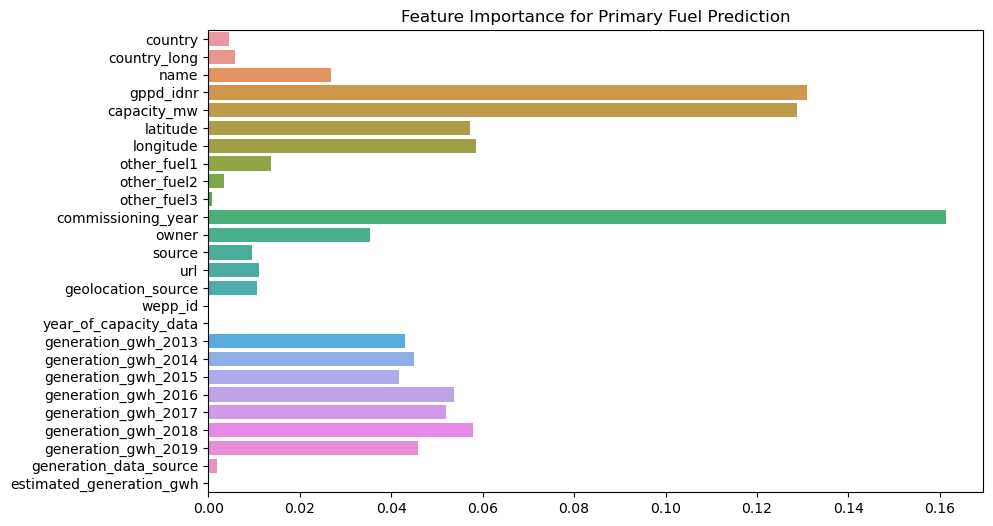

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=clf.feature_importances_, y=X_fuel.columns)
plt.title('Feature Importance for Primary Fuel Prediction')
plt.show()


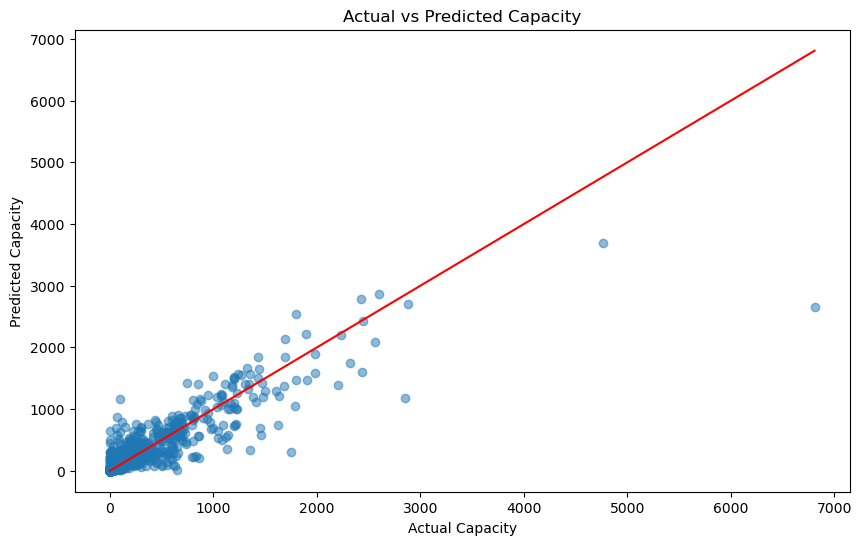

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_capacity, y_pred_capacity, alpha=0.5)
plt.plot([min(y_test_capacity), max(y_test_capacity)], [min(y_test_capacity), max(y_test_capacity)], color='red')
plt.xlabel('Actual Capacity')
plt.ylabel('Predicted Capacity')
plt.title('Actual vs Predicted Capacity')
plt.show()


In [ ]:
# Global Power Plant Database Project

## Introduction
This project utilizes the Global Power Plant Database to predict two key attributes of power plants: the primary fuel type and the capacity in megawatts (MW). The dataset includes data from approximately 14,000 power plants in the USA, Australia, and India, covering both thermal and renewable energy sources.

## Data Overview
- **Number of samples**: X 
- **Number of features**: 29
- **Countries covered**: USA, Australia (AUS), India (IND)
- **Features**:
  - `country`
  - `country_long`
  - `name`
  - `gppd_idnr`
  - `capacity_mw`
  - `latitude`
  - `longitude`
  - `primary_fuel`
  - `other_fuel1`
  - `other_fuel2`
  - `other_fuel3`
  - `commissioning_year`
  - `owner`
  - `source`
  - `url`
  - `geolocation_source`
  - `wepp_id`
  - `year_of_capacity_data`
  - `generation_gwh_2013`
  - `generation_gwh_2014`
  - `generation_gwh_2015`
  - `generation_gwh_2016`
  - `generation_gwh_2017`
  - `generation_gwh_2018`
  - `generation_gwh_2019`
  - `generation_data_source`
  - `estimated_generation_gwh_2013`
  - `estimated_generation_gwh_2014`
  - `estimated_generation_gwh_2015`
  - `estimated_generation_gwh_2016`
  - `estimated_generation_gwh_2017`
  - `estimated_generation_note_2013`
  - `estimated_generation_note_2014`
  - `estimated_generation_note_2015`
  - `estimated_generation_note_2016`
  - `estimated_generation_note_2017`

## Methodology

### 1. Data Import and Libraries
- Imported necessary libraries such as pandas, numpy, seaborn, matplotlib, and sklearn.
- Loaded the datasets from the three CSV files: database_USA.csv, database_AUS.csv, database_IND.csv.

### 2. Exploratory Data Analysis (EDA)
- Conducted an overview of the combined dataset.
- Checked for missing values and data types.
- Visualized distributions and relationships between features and target variables using pair plots, histograms, and bar plots.
- Analyzed correlations using a heatmap.

### 3. Data Preprocessing and Feature Engineering
- Combined the datasets from the three countries into a single DataFrame.
- Handled missing values by imputing with appropriate strategies (mean/median for numerical, mode for categorical).
- Encoded categorical variables into numerical using encoding techniques (One-Hot Encoding, Label Encoding).
- Standardized features to ensure uniformity in scale.
- Split data into features (X) and target (y) for both tasks (primary fuel type and capacity prediction).

### 4. Model Building and Evaluation

#### Primary Fuel Type Prediction
- Models used: Logistic Regression, Random Forest Classifier, Gradient Boosting Classifier, XGBoost Classifier
- Evaluation metrics: Accuracy, Precision, Recall, F1-score
- Cross-validated models to ensure robustness and avoid overfitting.

#### Capacity Prediction
- Models used: Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, XGBoost Regressor
- Evaluation metrics: RMSE, R²
- Cross-validated models to ensure robustness and avoid overfitting.

### 5. Hyperparameter Tuning and Model Selection
- Performed hyperparameter tuning for both tasks using GridSearchCV.
- Selected the best hyperparameters and evaluated the final models.

## Conclusion
The Tuned XGBoost Classifier provided the best performance for
predicting the primary fuel type, while the Tuned Random Forest
Regressor excelled in predicting the capacity in megawatts. These
models were chosen as the final models for their respective tasks.

## Future Work
Further improvements can be made by exploring additional features,
experimenting with other machine learning algorithms, and fine-tuning the hyperparameters more extensively.
Additionally, incorporating more recent data and expanding the geographical scope of the dataset could enhance model
performance and applicability.
